# 데이터 사전처리 (이미지)

## Setup

This tutorial provides a simple example of how to load an image dataset using tf.data.

In [1]:
import tensorflow as tf

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

1.15.0


tf.data API로 성능 향상하기 : <https://www.tensorflow.org/guide/data_performance?hl=ko>

- 수동으로 조정하거나 tf.data.experimental.AUTOTUNE으로 설정하면      
    tf.data 런타임이 실행 시에 동적으로 값을 조정하도록 만든다. 

```py
# 
AUTOTUNE = tf.data.experimental.AUTOTUNE
```

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## 이미지 검색 

꽃 사진을 이용해 진행 -> 사본 다운로드      

dir에는 클래스탕 하나씩 5개의 하위 디렉토리가 존재 

In [3]:
import pathlib

url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin=url,fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
img_cnt_lit = list(data_dir.glob('*/*.jpg'))
img_cnt_lit[:5]

[WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
img_cnt_dir = list(data_dir.glob('*'))
img_cnt_dir[:5]

[WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/daisy'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/dandelion'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/LICENSE.txt'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/roses'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/sunflowers')]

In [6]:
img_cnt = len(list(data_dir.glob('*/*.jpg')))
img_cnt

3670

### WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/LICENSE.txt')를 걸러야함

디렉토리를 보면 각 디렉토리에는 해당 유형의 꽃 이미지가 포함된것을 확인가능하다.

In [7]:
# WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/LICENSE.txt')를 걸러낸다.
# 카테고리들의 이름 
class_naems = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
class_naems

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [8]:
# 이번에는 장미 

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:4]

[WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/leejh/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg')]

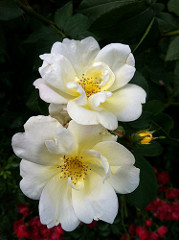

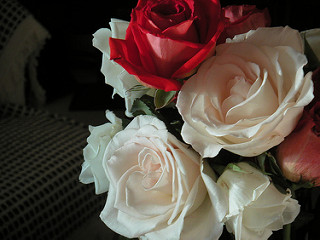

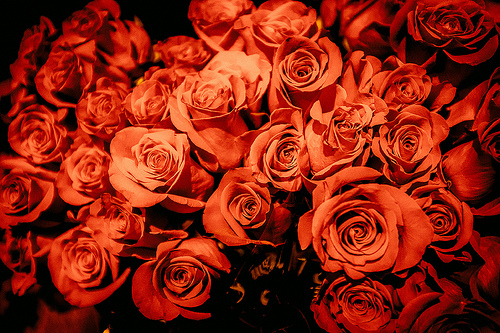

In [10]:
for img_path in roses[:3]:
    display.display(Image.open(str(img_path)))

#  전처리 

In [11]:
# The 1./255 is to convert from uint8 to float32 in range [0,1]
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [12]:
# 매개변수를 정의 

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(img_cnt/BATCH_SIZE)

```py

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

```

In [13]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(class_naems))

Found 3670 images belonging to 5 classes.


5 개의 클래스에 속하는 3670 개의 이미지를 찾았습니다.

## 배치 확인 

In [26]:
def show_batch(img_batch,label_batch):
    # 
    plt.figure(figsize=(10,10))
    
    for num in range(25):
        ax = plt.subplot(5, 5, num+1)
        plt.imshow(img_batch[num])
        plt.title(class_naems[label_batch[num]==1][0].title())
        plt.axis('off')
        

In [27]:
img_batch,label_batch = next(train_data_gen)

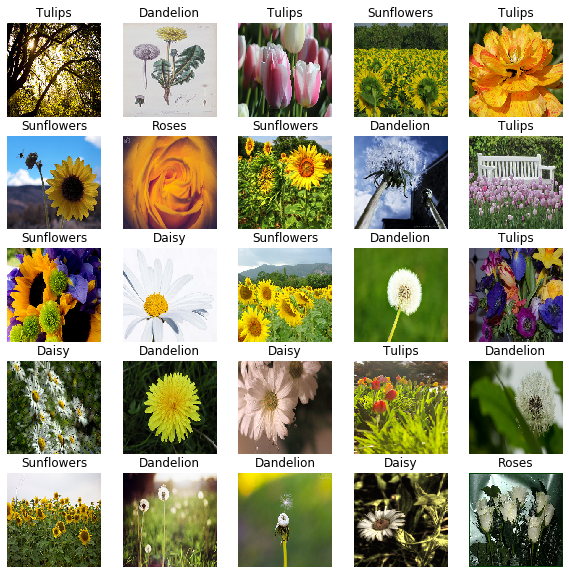

In [28]:
show_batch(img_batch,label_batch)

# 자체 팩을 사용해서 로드 

케라스의 퍼프로세싱 메소드는 방법은 편리하나 세가지 단점이 존재 

1. 느리다. 아래의 성능 확인을 통해서 알수 있다. 
2. 세밀한 제어가 불가능 하다. 
3. 나머지 텐서플로우와 호완이 잘 안된다. 

그래서 파일을 tf.data.Dataset먼저 로드하려면 파일 경로의 데이터 세트를 작성할것이다.

아래에서는 덴서2.0버전을 사용해야한다. 

In [29]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [30]:
# take메소드는 뭔가요 
for f in list_ds.take(5):
    #
    print(f.numpy())

RuntimeError: __iter__() is only supported inside of tf.function or when eager execution is enabled.